<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Neural Networks with TensorFlow

_Authors: Richard Harris (CHI)_

---

<a id="learning-objectives"></a>
### Learning Objectives
- Get a quick overview of neural networks
- Build a linear regression in Tensorflow
- Tune our approach to linear regression to make it more efficient
- Build a Multilayer Perceptron Feed-forward network

### Lesson Guide

- [Introduction](#introduction)
- [What are Neural Networks?](#what-are-neural-networks)
- [Pros vs. Cons](#pros-vs-cons)
- [Features](#features)
- [Outputs](#outputs)
- [Hidden Layers](#hidden-layers)
- [Activation Function](#activation-function)
	- [ReLU](#relu)
	- [Softmax](#softmax)
- [Backpropogation](#backpropogation)
- [Epochs and Batch Sizes](#epochs-and-batch-sizes)
- [Common Neural Net libraries in Python](#common-neural-net-libraries-in-python)
- [Codealong: Linear Models in TensorFlow](#codealong-linear-models-in-tensorflow)
	- [Setup parameters and data that we will use later](#setup-parameters-and-data-that-we-will-use-later)
	- [Create tensors that correspond to our data](#create-tensors-that-correspond-to-our-data)
	- [Create weights to use in our model](#create-weights-to-use-in-our-model)
	- [Define a linear equation](#define-a-linear-equation)
	- [Define a loss function](#define-a-loss-function)
	- [Instantiate an optimizer](#instantiate-an-optimizer)
	- [Time to train our linear regression/neural network](#time-to-train-our-linear-regressionneural-network)
	- [Great, we've got a linear model, but there are still a few things we can improve](#great-weve-got-a-linear-model-but-there-are-still-a-few-things-we-can-improve)
	- [An example with real data](#an-example-with-real-data)
	- [Create tensors that correspond to our data](#create-tensors-that-correspond-to-our-data)
	- [Create weights to use in our model](#create-weights-to-use-in-our-model)
	- [Create model, loss function, and optimizaer](#create-model-loss-function-and-optimizaer)
	- [Scale our data](#scale-our-data)
	- [Train our network on the Boston data](#train-our-network-on-the-boston-data)
	- [Plot MSE over Epochs](#plot-mse-over-epochs)
- [Train a Multilayer Perceptron on the Titanic data](#train-a-multilayer-perceptron-on-the-titanic-data)
	- [Load in the titanic data](#load-in-the-titanic-data)
	- [Do a bit of data cleaning](#do-a-bit-of-data-cleaning)
	- [Create tensors](#create-tensors)
	- [Create weights](#create-weights)
	- [Create the structure of the Multilayer Perceptron network](#create-the-structure-of-the-multilayer-perceptron-network)
	- [Define loss function](#define-loss-function)
	- [Define optimizer](#define-optimizer)
	- [Train the network](#train-the-network)
	- [A final example with more hidden layers](#a-final-example-with-more-hidden-layers)
- [Additionl Resources](#additionl-resources)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.base import TransformerMixin
from sklearn.preprocessing import Imputer, LabelBinarizer, OneHotEncoder
from sklearn.pipeline import make_pipeline, make_union
from sklearn.model_selection import train_test_split

<a id="introduction"></a>
## Introduction
---

Neural networks are incredibly powerful and constantly talked about these days -- they've handled tasks such as image classification, [playing Go](http://www.nature.com/news/google-ai-algorithm-masters-ancient-game-of-go-1.19234), and [creating tweets in the style of President Trump](https://twitter.com/deepdrumpf?lang=en) with relatively little effort.

This is a rapidly evolving field and represents some of the newest parts of Data Science, thanks to the increase in processing power and scale of data.

In short, what you'll find with neural networks are some advantages and disadvantages:

<a id="what-are-neural-networks"></a>
## What are Neural Networks?
---

Neural networks, in a single line, attempt to iteratively train a set (or sets) of weights that, when used together, return the most accurate predictions for a set of inputs. Just like many of our past models, the model is trained using a loss function, which our model will attempt to minimize over iterations. Remember that a loss function is some function that takes in our predictions and the actual values and returns some sort of aggregate value that shows how accurate (or not) we were.

Neural networks do this by establishing sets of neurons (known as hidden layers) that take in some sort of input(s), apply a weight, and pass that output onward. As we feed more data into the network, it adjusts those weights based on the output of the loss function, until we have highly trained and specific weights.

Why does one neuron turn out one way and a second neuron another? That's not generally something we can understand (though attempts have been made, such as Google's Deep Dream). You can understand this as a kind of (very advanced) mathematic optimization.

![](./assets/images/neuralnet.png)

<a id="pros-vs-cons"></a>
## Pros vs. Cons
---

**Advantages**

- Exceptionally accurate because we can learn complicated decision boundaries
- Appropriate for a vast range of techniques

**Disadvantages**

- Long training time
- Requires more data than most algorithms
- Can become very complex and hard to interpret
- Less user-friendly coding

<a id="features"></a>
## Features
---

Much like our other machine learning techniques, we do need to feed data into the network. While neural networks are pretty good at taking data in any form, it can help the network a lot to reduce the number of inputs when necessary -- particularly with image data. A smaller quantity inputs can usually give just as good results as a larger input without much change in accuracy.

<a id="outputs"></a>
## Outputs
---

Much like other techniques, we do want some sort of output at the end as well. In most cases:

for a regression style technique, one output is usually fine
for a classification technique, one output per class is a good idea (in other words, we model a one-against-all approach)


<a id="hidden-layers"></a>
## Hidden Layers
---

What makes neural networks tick is the idea of hidden layers. Hidden does not mean anything particularly devious here, just that it is not the input or the output layer.

Hidden layers can have any number of neurons per layer and you can include any number of layers in a neural network. Inputs into a neuron have different weights that are modified across iterations of the model and have a bias term as well -- you can kind of almost imagine them as mini-linear models (though, that linearity does not need to hold at all).

<a id="activation-function"></a>
## Activation Function
---

Neurons also may have an activation function that "turns them on" in certain cases. Some examples are:

<a id="relu"></a>
### ReLU

Also known as a [Rectified Linear Unit](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)), this turns the output to 0 if the output would be less than 0 (i.e., take the output and feed it through f(y) = max(0, y)). This means that the neuron is activated when its output is positive and not activated otherwise.

<a id="softmax"></a>
### Softmax

Used frequently at the output layer, this essentially "squishes" a bunch of inputs into a normalized scale of 0-1, which is great for creating something akin to a probability of falling into a given class. ([More information here](https://en.wikipedia.org/wiki/Softmax_function))

There's a wealth of information on different types of activation functions within [this article](https://en.wikipedia.org/wiki/Activation_function) -- different activation functions, hidden layers, and neurons per layer can change how effective your neural network will be!

<a id="backpropogation"></a>
## Backpropogation
---

While there are many ways that a neural network learns, we'll focus in this seminar week on the easiest to understand method. Backpropogation is the process of using how well the network performed compared to the actual outputs and using those errors to propogate changes to the weights in each hidden layer.

How do we make good or bad choices within the network? We compare the outputs of the predictions (using the loss function), and make tiny changes to compare the outputs. Most frequently we use a learning rate and a gradient descent method to estimate the changes that our successive models have used.

<a id="epochs-and-batch-sizes"></a>
## Epochs and Batch Sizes
---

Epochs: The number of iterations of full model fitting (i.e., how many times do you run through the fitting process?) There's no upper limit but generally there will be a point where additional epochs do not generate new insights
Batch Size: Neural networks tend to work best when you feed portions of your data in at a time (versus the full set) and adjust weights in between. Smaller batches allow for more frequent updates but may be less consistent in what changes are needed.

<a id="common-neural-net-libraries-in-python"></a>
## Common Neural Net libraries in Python
---

There are a number of libraries available for neural networks in Python, including:

- [Tensorflow](https://www.tensorflow.org/)
- [Caffe](http://caffe.berkeleyvision.org/)
- [Lasagne](https://lasagne.readthedocs.io/en/latest/)
- [Theano](http://deeplearning.net/software/theano/)
- [Keras](https://keras.io/)

We'll be using the Tensorflow library (by Google) in these examples, but the development environment is very open right now!

<a id="codealong-linear-models-in-tensorflow"></a>
## Codealong: Linear Models in TensorFlow
---

Haven't you ever wanted to get rid of those pesky linear models in sklearn? Let's replicate that effort using Tensorflow.

Tensorflow works by setting up `tensors`, which essentially hold numeric data of various shapes, and passes them through user-defined operations. The user-defined operations will be our Neural Network layers. When we initialize a session within Tensorflow, that starts the process of filling (or refilling) those tensors. You can imagine this system as actually setting up a set of calculations first and then filling them in with real data later.

**Tensors are a lot like vectors and matricies:**
- 0D Tensor = Scalar
- 1D Tensor = Vector
- 2D Tensor = Matrix
- 4D Tensor = ??

What we'll do here is start with some fake data to show off the basic process and then use some real data to reinforce those lessons.

(This first section is taken from [this example](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/linear_regression.ipynb))

<a id="setup-parameters-and-data-that-we-will-use-later"></a>
### Setup parameters and data that we will use later

In [2]:
# Set up some parameters that we will use later

learning_rate = 0.01 # Size of Gradient Descent step
training_epochs = 2000 # How many times we'll iterate through the full set
display_step = 50 # We want to see something every 50 steps

In [3]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

<a id="create-tensors-that-correspond-to-our-data"></a>
### Create tensors that correspond to our data

In [4]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

<a id="create-weights-to-use-in-our-model"></a>
### Create weights to use in our model
- W will be the weight term, like the beta coefficient in a linear regression
- b will be the bias term like the constant in a linear regression

In [5]:
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

<a id="define-a-linear-equation"></a>
### Define a linear equation
- As we build more complex networks we can change this equation

This sure starts to look like we're trying to identify the weights for an equation that looks like:

$Y = b + W \cdot X$

is the same thing as

$Y = \alpha + \beta \cdot X$

which should look a lot like a linear regression.

In [6]:
pred = tf.add(tf.multiply(X, W), b)

<a id="define-a-loss-function"></a>
### Define a loss function
- As most machine learning models, we need someway to measure how close our prediction are to our actual values.
- In this case we use mean squared error, although the syntax may look a little foreign
- reduce_sum is the same as a sum in Python

In [7]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

So far we've written the optimization problem:

$$\min_{w, b} {\|y - (Xw + b) \|}$$

Which says that we want to find a set of b and W that makes mean squared error as small as possible on our training data.

<a id="instantiate-an-optimizer"></a>
### Instantiate an optimizer
- We still need a way to solve for our weights W
- Tensorflow comes with several solvers to do the work for us

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

<a id="time-to-train-our-linear-regressionneural-network"></a>
### Time to train our linear regression/neural network
- We instantiate a tensorflow session using tf.Session()
- Rather than training the network completely, we will loop every 50 epochs so we can see b and W change and watch our MSE drop.

Epoch: 0050 cost=  0.154262 W= 0.405064 b= -0.316979
Epoch: 0100 cost=  0.145331 W= 0.395818 b= -0.25046
Epoch: 0150 cost=  0.137431 W= 0.387121 b= -0.187897
Epoch: 0200 cost=  0.130444 W= 0.378942 b= -0.129055
Epoch: 0250 cost=  0.124264 W= 0.371249 b= -0.0737121
Epoch: 0300 cost=  0.118798 W= 0.364013 b= -0.021661
Epoch: 0350 cost=  0.113963 W= 0.357208 b= 0.0272943
Epoch: 0400 cost=  0.109687 W= 0.350808 b= 0.0733379
Epoch: 0450 cost=  0.105905 W= 0.344788 b= 0.116643
Epoch: 0500 cost=  0.102560 W= 0.339127 b= 0.157373
Epoch: 0550 cost=  0.099602 W= 0.333802 b= 0.19568
Epoch: 0600 cost=  0.096985 W= 0.328793 b= 0.231709
Epoch: 0650 cost=  0.094671 W= 0.324083 b= 0.265596
Epoch: 0700 cost=  0.092624 W= 0.319653 b= 0.297467
Epoch: 0750 cost=  0.090814 W= 0.315486 b= 0.327442
Epoch: 0800 cost=  0.089213 W= 0.311567 b= 0.355634
Epoch: 0850 cost=  0.087797 W= 0.307881 b= 0.38215
Epoch: 0900 cost=  0.086545 W= 0.304414 b= 0.407089
Epoch: 0950 cost=  0.085438 W= 0.301154 b= 0.430544
Epoch:

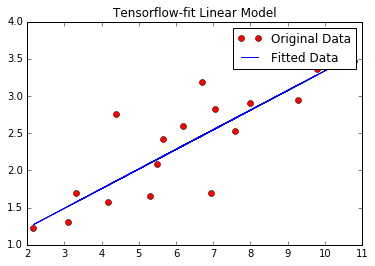

In [9]:
# Give initial values to b and w
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    # Print results from every few epochs
    for epoch in range(training_epochs): 
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y:y})
        
        
        if (epoch+1) % display_step == 0: 
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print 'Epoch:', '%04d' % (epoch+1), 'cost=', '{:9f}'.format(c), \
            "W=", sess.run(W), "b=", sess.run(b)
    
    print 'Optimization finished'
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'
    
    
    # Plot final regression
    plt.plot(train_X, train_Y, 'ro', label='Original Data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted Data')
    plt.title('Tensorflow-fit Linear Model')
    plt.legend()
    plt.show()

<a id="great-weve-got-a-linear-model-but-there-are-still-a-few-things-we-can-improve"></a>
### Great, we've got a linear model, but there are still a few things we can improve
- We need to extend this concept to multiple regression with several Ws
- We can standardize the inputs to make it easier for the solver to find a solution

<a id="an-example-with-real-data"></a>
### An example with real data
- We'll use the boston data set to implement multiple regression in TensorFlow

In [10]:
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
boston.target[0:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

<a id="create-tensors-that-correspond-to-our-data"></a>
### Create tensors that correspond to our data
- This we tell Tensorflow that our feature matrix has 13 features and our outcome has one vector
- We also tell it how many observations we have

In [13]:
X = tf.placeholder(tf.float32, shape=[None, 13], name='Xs')
Y = tf.placeholder(tf.float32, shape=[None, 1], name='Y')
n_samples = df.shape[0]

<a id="create-weights-to-use-in-our-model"></a>
### Create weights to use in our model


In [14]:
W = tf.Variable(tf.zeros([13, 1]))
b = tf.Variable(tf.zeros([1]))

<a id="create-model-loss-function-and-optimizaer"></a>
### Create model, loss function, and optimizaer
- We will modify the model a little with matrix multiplication so we can use mutiple Ws

In [15]:
pred = tf.add(tf.matmul(X, W), b)

In [16]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

<a id="scale-our-data"></a>
### Scale our data
- Optimization problems tend to work best when all the numbers and derivatives are around the same magnitude
    - Neural Nets are especially sensitive to this
- We will use sklearn to standardize our data

In [18]:
from sklearn.preprocessing import StandardScaler
train_X = StandardScaler().fit_transform(df.values)
train_Y = boston.target
cost_history = []

<a id="train-our-network-on-the-boston-data"></a>
### Train our network on the Boston data

In [19]:
# Set up some parameters that we will use later

learning_rate = 0.01 # Size of Gradient Descent step
training_epochs = 1000 # How many times we'll iterate through the full set
display_step = 50 # We want to see something every 50 steps

Epoch: 0050 cost= 109.496483 W= [-0.56201518  0.46835619 -0.61104381  0.55889142 -0.47626033  1.81559396
 -0.36564958 -0.1600478  -0.29272541 -0.57083827 -1.09925532  0.55320776
 -1.64753366] b= [ 8.90032101] 

Epoch: 0100 cost= 47.493828 W= [-0.58871984  0.45371988 -0.5614242   0.78619611 -0.43711033  2.575845
 -0.25068393 -0.6731317  -0.02960126 -0.4996174  -1.44008243  0.66400641
 -2.27466226] b= [ 14.28506851] 

Epoch: 0150 cost= 24.869040 W= [-0.59252065  0.44397196 -0.51269847  0.8609367  -0.46293616  2.95881987
 -0.18989979 -1.04056668  0.18664187 -0.44456077 -1.60275173  0.73729998
 -2.6562469 ] b= [ 17.54287148] 

Epoch: 0200 cost= 16.540710 W= [-0.59833997  0.44930342 -0.47929701  0.8714394  -0.53116816  3.14418721
 -0.16572933 -1.30951416  0.3538354  -0.42011723 -1.68824065  0.79211408
 -2.90699053] b= [ 19.51386833] 

Epoch: 0250 cost= 13.430635 W= [-0.60717493  0.46441856 -0.45492196  0.85811615 -0.61741561  3.2223146
 -0.1580416  -1.51833618  0.4876076  -0.41701069 -1.737

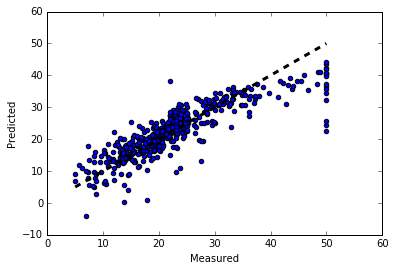

In [20]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs): 
        sess.run(optimizer, feed_dict={X: train_X, Y:train_Y.reshape(506, 1)})
        cost_history.append(sess.run(cost, feed_dict={X: train_X, Y:train_Y.reshape(506, 1)}))
        
        if (epoch+1) % display_step == 0: 
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y.reshape(506, 1)})
            print 'Epoch:', '%04d' % (epoch+1), 'cost=', '{:9f}'.format(c), \
            "W=", sess.run(W).reshape(13,), "b=", sess.run(b), '\n'
            
    
    print 'Optimization finished'
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y.reshape(506,1)})
    print "Training cost=", training_cost, '\n', "intercept: ", sess.run(b)[0],'\n'
    weights = sess.run(W).reshape(13,)
    for x in zip(df.columns, weights):
        print x[0], ':', x[1]
        
    pred_y = sess.run(pred, feed_dict={X: train_X})
    mse = sess.run(cost, feed_dict={X:train_X, Y:train_Y.reshape(506,1)})
    print("MSE: %.4f" % mse) 

    fig, ax = plt.subplots()
    ax.scatter(train_Y, pred_y)
    ax.plot([train_Y.min(), train_Y.max()], [train_Y.min(), train_Y.max()], 'k--', lw=3)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

This is hard to read because there is more going on, but it's just like Multiple Linear Regression. As we train our network further and further we get better estimates for our parameters and our MSE decreases.

<a id="plot-mse-over-epochs"></a>
### Plot MSE over Epochs

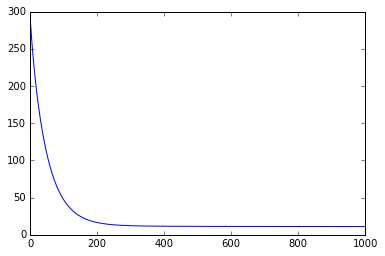

In [21]:
plt.plot(range(1000) , cost_history)

<a id="train-a-multilayer-perceptron-on-the-titanic-data"></a>
## Train a Multilayer Perceptron on the Titanic data
---

- A feedforward multilayer perceptron is one the most well known neural network archtectures
- They a structured just like the picture in the intro
    - We have an input layer of features
    - These input features are passed into neurons in the hidden layers
    - Each neuron is a perceptron, kind of like a bunch of small linear regressions
    - We pass information from one layer of neurons to the next layer of neurons until we hit the output layer
    - The output layer does one calculation to output a prediction of our outome.

![](./assets/images/neuralnet.png)

<a id="load-in-the-titanic-data"></a>
### Load in the titanic data

In [22]:
data = pd.read_csv('assets/datasets/titanic_train.csv')
X = data.drop('Survived', axis=1)
y = data[['Survived']]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<a id="do-a-bit-of-data-cleaning"></a>
### Do a bit of data cleaning

In [24]:
# Create a helper class to extract features one by one in a pipeline
class FeatureExtractor(TransformerMixin):
    def __init__(self, column):
        self.column = column
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, x, y=None):
        return x[self.column].values.reshape(-1, 1)
    
    
FeatureExtractor('Fare').fit_transform(X_train)[0:5]

array([[ 51.8625],
       [ 15.5   ],
       [ 41.5792],
       [ 14.4542],
       [ 10.5167]])

In [25]:
# Create a pipeline to binarize labels and impute missing values with an appropriate method
pclass_pipe = make_pipeline(
    FeatureExtractor('Pclass'),
    LabelBinarizer(),
    Imputer(strategy='most_frequent')
)
sex_pipe = make_pipeline(
    FeatureExtractor('Sex'),
    LabelBinarizer(),
    Imputer(strategy='most_frequent')
)
age_pipe = make_pipeline(
    FeatureExtractor('Age'),
    Imputer(strategy='mean')
)
sibsp_pipe = make_pipeline(
    FeatureExtractor('SibSp'),
    Imputer(strategy='most_frequent')
)
parch_pipe = make_pipeline(
    FeatureExtractor('Parch'),
    Imputer(strategy='most_frequent')
)

fu = make_union(pclass_pipe, sex_pipe, age_pipe, sibsp_pipe, parch_pipe)

In [26]:
fu.fit(X_train)

fu.transform(X_train)[0:5]

array([[  1.        ,   0.        ,   0.        ,   1.        ,
         54.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   1.        ,   1.        ,
         29.52598326,   0.        ,   0.        ],
       [  0.        ,   1.        ,   0.        ,   1.        ,
         25.        ,   1.        ,   2.        ],
       [  0.        ,   0.        ,   1.        ,   1.        ,
         26.        ,   1.        ,   0.        ],
       [  0.        ,   0.        ,   1.        ,   0.        ,
         22.        ,   0.        ,   0.        ]])

In [27]:
# Create X, y, train, and test
def multi_binarizer(data):
    data = data.copy()
    data['Survived Class 0'] = data['Survived'].apply(lambda x: 1 if x == 0 else 0)
    return data[['Survived Class 0', 'Survived']].values

train_X = fu.transform(X_train)
train_Y = multi_binarizer(y_train)
test_X = fu.transform(X_test)
ttest_Y = multi_binarizer(y_test)

<a id="create-tensors"></a>
### Create tensors

In [28]:
n_input = train_X.shape[1]
n_train = train_X.shape[0]
n_classes = 2

x = tf.placeholder('float', [None, n_input])
y = tf.placeholder('float', [None, n_classes])

<a id="create-weights"></a>
### Create weights

In [29]:
# Define the number of neurons in each hidden layer
n_hidden_1 = 4
n_hidden_2 = 4

In [30]:
stddev = 0.1

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1], stddev=stddev)),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev=stddev)),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes], stddev=stddev))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

<a id="create-the-structure-of-the-multilayer-perceptron-network"></a>
### Create the structure of the Multilayer Perceptron network
- This is very similar to what we did in linear regression
    - `tf.add(tf.matmul(x, weights['h1']), biases['b1'])` is nearly identical
- There are two major changes
    - We now use a dictionary to make it easier to access our weight
    - We wrap the output from each layer in a ReLu function, `tf.nn.relu()`
- Each layer is fed directly into the next layer, which is why we call it a feed-forward network
    
    
Note: ReLu functions have come into popularity lately because the flat part of the function allows us to train complex interactions, while the linear part of the function helps us avoid the [vanishing gradient](https://en.wikipedia.org/wiki/Vanishing_gradient_problem) problem.

**The ReLu function**
![](./assets/images/relu.png)

In [31]:
def multilayer_perceptron(x, weights, biases):
    # Layer 1, ReLU activation, 4 neurons
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    # Layer 2, ReLU activation, 4 Neurons
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    return tf.matmul(layer_2, weights['out']) + biases['out']

In [32]:
pred = multilayer_perceptron(x, weights, biases)

<a id="define-loss-function"></a>
### Define loss function
- We no longer MSE because this is not a regression problem, but a classification
- Cross-entropy is a common loss function to use with neural nets

In [33]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

<a id="define-optimizer"></a>
### Define optimizer

In [34]:
optm = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

<a id="train-the-network"></a>
### Train the network
- We've changed the training procedure a little
- We've added a batch_size.
    - This is a trick to make optimization faster
    - Rather than using all of our samples on every epoch to train the network, we sample observations
    - This reduces the computation time, without a heavy impact on the optimization procedure

In [35]:
learning_rate = 0.001 # A weight to determine how fast the network is trained
training_epochs = 2500 # How many times we update the weights by the learning_rate
batch_size = 50 # How many samples of data we use at a time to compute the update
display_step = 100 # How often

corr = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accr = tf.reduce_mean(tf.cast(corr, 'float'))
init = tf.global_variables_initializer()

In [36]:
sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs):
    avg_cost = 0.0
    total_batch = int(n_train/batch_size)
    for i in range(total_batch):
        random_index = np.random.randint(n_train, size=batch_size)
        batch_xs = train_X[random_index, :]
        batch_ys = train_Y[random_index, :]
        sess.run(optm, feed_dict={x: batch_xs, y: batch_ys})
        avg_cost += sess.run(cost,
            feed_dict={x: batch_xs, y: batch_ys})/total_batch
        
    if epoch % display_step == 0:
        print ("Epoch: %03d/%03d cost: %.9f" % 
               (epoch, training_epochs, avg_cost))
        train_acc = sess.run(accr, feed_dict={x: batch_xs, y: batch_ys})
        print (" Training accuracy: %.3f" % (train_acc))

Epoch: 000/2500 cost: 0.801703930
 Training accuracy: 0.300
Epoch: 100/2500 cost: 0.667392221
 Training accuracy: 0.600
Epoch: 200/2500 cost: 0.653392163
 Training accuracy: 0.640
Epoch: 300/2500 cost: 0.657487062
 Training accuracy: 0.700
Epoch: 400/2500 cost: 0.664966264
 Training accuracy: 0.540
Epoch: 500/2500 cost: 0.646538231
 Training accuracy: 0.620
Epoch: 600/2500 cost: 0.652824120
 Training accuracy: 0.580
Epoch: 700/2500 cost: 0.651596384
 Training accuracy: 0.620
Epoch: 800/2500 cost: 0.651729746
 Training accuracy: 0.680
Epoch: 900/2500 cost: 0.634381018
 Training accuracy: 0.560
Epoch: 1000/2500 cost: 0.662174680
 Training accuracy: 0.640
Epoch: 1100/2500 cost: 0.601430416
 Training accuracy: 0.620
Epoch: 1200/2500 cost: 0.562362476
 Training accuracy: 0.760
Epoch: 1300/2500 cost: 0.551218802
 Training accuracy: 0.620
Epoch: 1400/2500 cost: 0.482181427
 Training accuracy: 0.860
Epoch: 1500/2500 cost: 0.445274025
 Training accuracy: 0.880
Epoch: 1600/2500 cost: 0.443089659

In [37]:
predictions = sess.run(tf.argmax(pred, 1), feed_dict={x:test_X})

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test['Survived'], predictions)

0.81694915254237288

<a id="a-final-example-with-more-hidden-layers"></a>
### A final example with more hidden layers

Epoch: 000/7500 cost: 0.703459539
 Training accuracy: 0.540
Epoch: 100/7500 cost: 0.648077277
 Training accuracy: 0.720
Epoch: 200/7500 cost: 0.650019066
 Training accuracy: 0.720
Epoch: 300/7500 cost: 0.633597667
 Training accuracy: 0.660
Epoch: 400/7500 cost: 0.655787349
 Training accuracy: 0.640
Epoch: 500/7500 cost: 0.655253416
 Training accuracy: 0.620
Epoch: 600/7500 cost: 0.641669658
 Training accuracy: 0.760
Epoch: 700/7500 cost: 0.606665308
 Training accuracy: 0.680
Epoch: 800/7500 cost: 0.502929246
 Training accuracy: 0.840
Epoch: 900/7500 cost: 0.458643954
 Training accuracy: 0.860
Epoch: 1000/7500 cost: 0.474865602
 Training accuracy: 0.760
Epoch: 1100/7500 cost: 0.460915506
 Training accuracy: 0.780
Epoch: 1200/7500 cost: 0.426819742
 Training accuracy: 0.780
Epoch: 1300/7500 cost: 0.450268859
 Training accuracy: 0.840
Epoch: 1400/7500 cost: 0.432139212
 Training accuracy: 0.840
Epoch: 1500/7500 cost: 0.445740963
 Training accuracy: 0.840
Epoch: 1600/7500 cost: 0.413085572

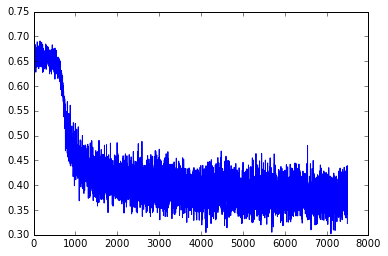

In [39]:
learning_rate = 0.005
training_epochs = 7500
batch_size = 50
display_step = 100

n_hidden_1 = 8
n_hidden_2 = 8
n_hidden_3 = 8
n_input = train_X.shape[1]
n_train = train_X.shape[0]
n_classes = 2

x = tf.placeholder('float', [None, n_input])
y = tf.placeholder('float', [None, n_classes])

def multilayer_perceptron(x, weights, biases):
    # Layer 1, ReLU activation, 4 neurons
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    # Layer 2, ReLU activation, 4 Neurons
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    # Layer 3, ReLu activation, 4 Neurons
    layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['h3']), biases['b3']))
    return tf.matmul(layer_3, weights['out']) + biases['out']

stddev = 0.1

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1], stddev=stddev)),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev=stddev)),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3], stddev=stddev)),
    'out': tf.Variable(tf.random_normal([n_hidden_3, n_classes], stddev=stddev))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

pred = multilayer_perceptron(x, weights, biases)


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optm = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# We also set up some helper functions

corr = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accr = tf.reduce_mean(tf.cast(corr, 'float'))

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

cost_counter = []

for epoch in range(training_epochs):
    avg_cost = 0.0
    total_batch = int(n_train/batch_size)
    for i in range(total_batch):
        random_index = np.random.randint(n_train, size=batch_size)
        batch_xs = train_X[random_index, :]
        batch_ys = train_Y[random_index, :]
        sess.run(optm, feed_dict={x: batch_xs, y: batch_ys})
        avg_cost += sess.run(cost,
            feed_dict={x: batch_xs, y: batch_ys})/total_batch
        
    cost_counter.append(avg_cost)
        
    if epoch % display_step == 0:
        print ("Epoch: %03d/%03d cost: %.9f" % 
               (epoch, training_epochs, avg_cost))
        train_acc = sess.run(accr, feed_dict={x: batch_xs, y: batch_ys})
        print (" Training accuracy: %.3f" % (train_acc))
        
predictions = sess.run(tf.argmax(pred, 1), feed_dict={x:test_X})

plt.plot(range(training_epochs), cost_counter)

In [40]:
predictions = sess.run(tf.argmax(pred, 1), feed_dict={x:test_X})

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test['Survived'], predictions)

0.82372881355932204

<a id="additionl-resources"></a>
## Additional Resources
---

- [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap1.html)
- [Deep Learning](http://www.deeplearningbook.org/)
- [Tensorflow Tutorials](https://github.com/pkmital/tensorflow_tutorials)
- [Awesome Tensorflow](https://github.com/jtoy/awesome-tensorflow)
- [Tensorflow Examples](https://github.com/aymericdamien/TensorFlow-Examples)
- [Mind: How to Build a Neural Network](https://stevenmiller888.github.io/mind-how-to-build-a-neural-network/)